# Hipotezė

Analizei pasirinkau duomenis iš https://data.gov.lt/. Naudojau 6 duomenų paketus iš atvirų duomenų VMI, Užimtumo tarnybos ir Oficialios Statistikos portalo. 
Darbo tikslas naudojant kuo daugiau įrankių iš Python, mySQL, Power BI, išanalizuoti 2020 m. gyventojų gautas pajamas Lietuvoje ir nustatyti ar yra ryšis tarp gyventojų gaunamų pajamų ir įsidarbinimo galimybių. Įsidarbinimo galimybes vertinau pagal darbdavių skaičių ir nedarbo lygį savivaldybėse. 
Visi naudoti duomenys 2020 metų. 

# 0. Duomenų ikėlimas į mySQL serverį

Kodas iki galo nėra veikiantis, nepavyko ištaisyti klaidos paskutinėje dalyje, įkeliant duomenis į lentelę mySQL. 

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Skirmante\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
pip install mysql-connector-python

  Using cached mysql_connector_python-8.0.29-cp310-cp310-win_amd64.whl (7.7 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Skirmante\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Svarbu! Būtina instaliuoti "mysql-connector-python". Kitu atveju neveikia prisijungimas prie mySQL duomen bazės.

In [1]:
import mysql.connector
import pandas as pd
import numpy as np

In [13]:
mydb = mysql.connector.connect(host='localhost',
                               port='3306',
                               user='root',
                               password='*****') #ĮRAŠYTI SLAPTAŽODĮ
cursor = mydb.cursor()
cursor.execute('SHOW DATABASES')
for i in cursor:
    print(i)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('vcs',)


In [11]:
sakila = pd.read_sql('SELECT * FROM vcs.adresas_t',con=mydb)
print(sakila)

C:\Users\Skirmante\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


    ID   miestas        gatve  namo_nr  buto_nr  salis_id
0    1   Vilnius  Justiniškių      159     55.0         1
1    2   Vilnius  Justiniškių       19     12.0         1
2    3   Vilnius  Justiniškių      369      2.0         1
3    4   Vilnius     Vilniaus       26     13.0         1
4    5   Vilnius        Sėlių        3      1.0         1
5    6   Vilnius       Kiškių        5      NaN         1
6    7    Kaunas     Vilniaus      159     55.0         1
7    8    Kaunas  Laisvės pr.       11     10.0         1
8    9    Kaunas  Laisvės pr.       11     11.0         1
9   10    Kaunas  Laisvės pr.       11     12.0         1
10  11    Kaunas  Laisvės pr.       11     13.0         1
11  12    Kaunas  Laisvės pr.       11     14.0         1
12  13     Seoul      Gangnam       11     14.0         9
13  14  New York     Manhaten       11     14.0         5


In [16]:
cursor.execute("USE vcs")
cnd_table = """CREATE TABLE verslo_liudijimai(
            savivaldybes_kodas DECIMAL (10),
            savivaldybe_ VARCHAR(20),
            veiklos_rusies_kodas DECIMAL (30), 
            veiklos_rusis VARCHAR (500),
            verslo_liudijimo_isdavimo_data DATE,
            verslo_liudijimo_anuliavimo_data DATE)"""
cursor.execute(cnd_table)
cursor.execute("SHOW TABLES")
for table in cursor:
    print(table)

('adresas_t',)
('filialas_t',)
('ismokos',)
('parduotuve_t',)
('preke_t',)
('prekiu_sarasas_t',)
('projektai_t',)
('salis_t',)
('tekstai_t',)
('uzsakymas_t',)
('verslo_liudijimai',)
('vykdymas_t',)
('vykdytojai_t',)


In [38]:
cursor.execute('USE vcs')
add_row_cnd = """INSERT INTO verslo_liudijimai VALUES
(%s, %s, %s, %s, %S, %s, %s, %s)
"""
failas=open(r'C:\Users\Skirmante\Documents\Data Analytics\Python\Baigiamasis darbas\27.csv', 'r', encoding="utf8") #Reikėjo įterpti "encoding", kitaip neveikė
eilutes = failas.readlines()
print(eilutes)
failas.close()

for eilute in eilutes[1:]:
    vertes=eilute.split('\t')
    cursor.execute(add_row_cnd, tuple(vertes))
    mydb.commit()

['savivaldybes_kuriai_priskirtas_verslo_liudijimas_kodas\tsavivaldybe_kuriai_priskirtas_verslo_liudijimas\tveiklos_rusies_kodas\tveiklos_rusis\tverslo_liudijimo_isdavimo_data\tverslo_liudijimo_anuliavimo_data\n', '"13000"\t"Vilnius"\t"5000000705"\t"Gyvenamosios paskirties patalpų nuoma, neteikiant apgyvendinimo paslaugų (kaimo turizmo paslaugos arba nakvynės ir pusryčių paslaugos)"\t"2019-12-27"\t""\n', '"13000"\t"Vilnius"\t"5000000349"\t"Galioja nuo 2020-07-01 Gyvenamosios paskirties patalpų nuoma."\t"2020-06-27"\t""\n', '"13000"\t"Vilnius"\t"5000000349"\t"Galioja nuo 2020-07-01 Gyvenamosios paskirties patalpų nuoma."\t"2020-06-27"\t""\n', '"13000"\t"Vilnius"\t"5000000349"\t"Galioja nuo 2020-07-01 Gyvenamosios paskirties patalpų nuoma."\t"2020-08-10"\t""\n', '"13000"\t"Vilnius"\t"5000000349"\t"Galioja nuo 2020-07-01 Gyvenamosios paskirties patalpų nuoma."\t"2020-08-10"\t""\n', '"13000"\t"Vilnius"\t"5000000349"\t"Galioja nuo 2020-07-01 Gyvenamosios paskirties patalpų nuoma."\t"2021-12-

ProgrammingError: Not enough parameters for the SQL statement

In [41]:
import pandas as pd
import numpy as np

# 1. Lentelių tvarkymas

## 1.1 Gyventojų pajamos

In [42]:

pajamos = pd.read_csv("C:\\Users\\Skirmante\\Documents\\Data Analytics\\Python\\Baigiamasis darbas\\GyventojuPajamos.csv")
pajamos.info()

df = pd.DataFrame(pajamos)
df.drop(['_type', '_id', '_revision'],axis=1, inplace =True) #Panaikinami nereikalingi stulpeliai, siekiant sumažinti duomenų kiekį.
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562128 entries, 0 to 3562127
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   _type            object 
 1   _id              object 
 2   _revision        object 
 3   eil_num          int64  
 4   metai            int64  
 5   sav_kodas        int64  
 6   sav_pavadinimas  object 
 7   kodas_gpmi       object 
 8   kodas            int64  
 9   suma             float64
 10  aprasas          object 
dtypes: float64(1), int64(4), object(6)
memory usage: 298.9+ MB


,eil_num,metai,sav_kodas,sav_pavadinimas,kodas_gpmi,kodas,suma,aprasas
0,1,2020,11,Alytaus m. sav.,B,5,144.0,"Dienpinigiai, išmokėti į komandiruotę išsiųsti..."
1,2,2020,11,Alytaus m. sav.,B,5,30.0,"Dienpinigiai, išmokėti į komandiruotę išsiųsti..."
2,3,2020,11,Alytaus m. sav.,B,5,7288.0,"Dienpinigiai, išmokėti į komandiruotę išsiųsti..."
3,4,2020,11,Alytaus m. sav.,B,5,949.0,"Dienpinigiai, išmokėti į komandiruotę išsiųsti..."
4,5,2020,11,Alytaus m. sav.,B,5,88.0,"Dienpinigiai, išmokėti į komandiruotę išsiųsti..."
...,...,...,...,...,...,...,...,...
3562123,1199177,2020,94,Jurbarko r. sav.,B,1,1627.0,Su darbo santykiais arba jų esmę atitinkančiai...
3562124,1199178,2020,94,Jurbarko r. sav.,B,1,15249.0,Su darbo santykiais arba jų esmę atitinkančiai...
3562125,1199179,2020,94,Jurbarko r. sav.,B,1,5204.0,Su darbo santykiais arba jų esmę atitinkančiai...
3562126,1199180,2020,94,Jurbarko r. sav.,B,1,11384.0,Su darbo santykiais arba jų esmę atitinkančiai...


In [43]:
df.describe() #mano atveju neitin naudinga funkcija dėl didžiulio duomenų kiekio

,eil_num,metai,sav_kodas,kodas,suma
count,3.562128e+06,3562128.0,3.562128e+06,3.562128e+06,3.561475e+06
mean,2.792762e+05,2020.0,3.970675e+01,1.957043e+01,8.166667e+03
std,3.264153e+05,0.0,2.551886e+01,2.908801e+01,3.746155e+04
min,1.000000e+00,2020.0,1.100000e+01,1.000000e+00,-3.360000e+02
25%,3.277900e+04,2020.0,1.800000e+01,1.000000e+00,2.200000e+02
50%,1.206540e+05,2020.0,3.000000e+01,3.000000e+00,1.874000e+03
75%,4.551530e+05,2020.0,6.100000e+01,2.300000e+01,9.961000e+03
max,1.199181e+06,2020.0,9.400000e+01,9.700000e+01,2.500033e+07


In [6]:
df.metai.unique()

array([2020], dtype=int64)

In [7]:
df.sav_pavadinimas.unique()

array(['Alytaus m. sav.', 'Birštono sav.', 'Vilniaus m. sav.',
       'Druskininkų sav.', 'Marijampolės sav.', 'Kauno m. sav.',
       'Klaipėdos m. sav.', 'Neringos sav.', 'Palangos m. sav.',
       'Panevėžio m. sav.', 'Šiaulių m. sav.', 'Visagino sav.',
       'Akmenės r. sav.', 'Alytaus r. sav.', 'Anykščių r. sav.',
       'Biržų r. sav.', 'Varėnos r. sav.', 'Vilkaviškio r. sav.',
       'Vilniaus r. sav.', 'Elektrėnų sav.', 'Zarasų r. sav.',
       'Ignalinos r. sav.', 'Jonavos r. sav.', 'Joniškio r. sav.',
       'Kalvarijos sav.', 'Kaišiadorių r. sav.', 'Kauno r. sav.',
       'Kėdainių r. sav.', 'Kelmės r. sav.', 'Klaipėdos r. sav.',
       'Kretingos r. sav.', 'Kupiškio r. sav.', 'Kazlų Rūdos sav.',
       'Lazdijų r. sav.', 'Mažeikių r. sav.', 'Molėtų r. sav.',
       'Pagėgių sav.', 'Pakruojo r. sav.', 'Panevėžio r. sav.',
       'Pasvalio r. sav.', 'Plungės r. sav.', 'Prienų r. sav.',
       'Radviliškio r. sav.', 'Raseinių r. sav.', 'Rokiškio r. sav.',
       'Rietavo sav.

In [8]:
df.kodas_gpmi.unique()

array(['B', 'D', 'F', 'C', 'E'], dtype=object)

In [9]:
df.kodas.unique()

array([ 5,  8,  9, 16, 18, 17, 23, 26, 27, 35, 31, 41, 43, 46, 47, 52, 60,
       55, 61, 68, 70, 71, 75, 77, 78, 89, 90, 93, 96,  7, 11, 15, 42, 29,
       30, 34, 51, 59, 64, 73,  4, 13, 12, 14, 36, 39, 62, 37, 45, 49, 65,
       66, 72, 74, 76,  3,  2,  6, 24, 33, 44, 48, 58, 38, 56, 67, 86, 88,
       92, 97,  1], dtype=int64)

In [157]:
df.aprasas.unique()

array(['Dienpinigiai, išmokėti į komandiruotę išsiųstiems darbuotojams LR Vyriausybės 2003 m. sausio 28 d. nutarimo Nr. 99 „Dėl Komandiruočių sąnaudų atskaitymo iš pajamų taisyklių patvirtinimo“ nustatyta tvarka',
       'Su darbo santykiais arba jų esmę atitinkančiais santykiais susijusios išmokos, kurios neapmokestinamos pagal GPMĮ 17 straipsnį, išskyrus žymimas 05, 06 ir 07 kodais',
       'Ligos išmokos jūrininkams, kurios neapmokestinamos pagal GPMĮ 17 straipsnio 1 dalies 45 punktą',
       'Privalomai registruotino kilnojamojo daikto arba daikto, kuris nekilnojamuoju pripažįstamas pagal įstatymus, pardavimo ar kitokio perleidimo nuosavybėn pajamos',
       'Būsto (įskaitant priskirtą žemę) pardavimo ar kitokio perleidimo nuosavybėn pajamos',
       'Nekilnojamojo pagal prigimtį daikto pardavimo ar kitokio perleidimo nuosavybėn išmokos (išskyrus žymimas 18 kodu)',
       'Nekilnojamojo pagal prigimtį daikto nuomos pajamos',
       'Išmokos iš paskirstytojo pelno (dividendai)',
   

Kodo apačioje idėja yra nustatyti kiekvienam unikaliam aprašo įrašui unikalų kodą ir taip pagreitinti kodo veikimą, nes aprašymo tekstai labai ilgi. Užkodavus skaitine reikšme pagreitėtų paiešką ir kodo veikimas. Bet kodas, deja, neveikė. Neradau tinkamo būdo, kaip priskirti unikalius indeksus kiekvienam aprašymo įrašui. 

In [ ]:
# apraso_kodas=df.aprasas.unique()
# apraso_kodas2=pd.DataFrame(apraso_kodas)
# apraso_kodas2.index.name = 'Indeksas'

# for i in apraso_kodas2[0]:
#     print(i)
# i=0
# while i < len(df['aprasas']):
#     for m in df['aprasas']:
#         if m in apraso_kodas2:
#             df['apraso_kodas']=apraso_kodas2.index
#         else:
#             continue
#     i=i+1


In [10]:
df['sav_pavadinimas']=df['sav_pavadinimas'].str.split('.').str[0]
#Savivaldybės pavadinima atskyriau per . ir palikau tik 1 dalį. Šito prireiks vėliau jungiant skirtingas lenteles su skirtingais savivaldybių pavadinimo užrašymo metodais. 

### 1.1.1 Pajamos pagal savivaldybę

In [11]:
pajamos_pagal_savivaldybes = df.groupby('sav_pavadinimas')['suma'].sum()/1000000
pajamos_pagal_savivaldybes.sort_values(ascending=False)


sav_pavadinimas
Vilniaus m          8045.341899
Kauno m             3232.170502
Klaipėdos m         1514.659490
Kauno r             1235.823623
Vilniaus r          1122.242231
Šiaulių m            956.179078
Panevėžio m          730.764567
Klaipėdos r          659.704681
Mažeikių r           448.237953
Kėdainių r           442.008327
Marijampolės sav     432.718584
Alytaus m            398.267395
Šiaulių r            384.056284
Jonavos r            366.344381
Panevėžio r          327.712819
Trakų r              321.249031
Telšių r             311.347647
Kretingos r          310.342117
Radviliškio r        305.601714
Utenos r             300.169126
Raseinių r           299.543100
Šilutės r            297.581654
Vilkaviškio r        296.206284
Tauragės r           289.911556
Ukmergės r           279.690742
Plungės r            279.554557
Šakių r              253.619313
Kaišiadorių r        241.882574
Šalčininkų r         224.303890
Palangos m           224.144962
Elektrėnų sav        222

### 1.1.2 Pajamos pagal pajamų rūšį

In [12]:
pajamos_pagal_aprasa = df.groupby('aprasas')['suma'].sum()/1000000
pajamos_pagal_aprasa.sort_values(ascending=False)

aprasas
Su darbo santykiais arba jų esmę atitinkančiais santykiais susijusios išmokos (įskaitant atleidžiamas nuo pajamų mokesčio pagal GPMĮ 37 straipsnį), išskyrus žymimas 04 ir 08 kodais                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      17709.124734
Pajamos iš individualios žemės ūkio veiklos                                                                                                                                                                                              

## 1.2 Išmokų dydis

ismokos = pd.read_csv("C:\\Users\\Skirmante\\Documents\\Data Analytics\\Python\\Baigiamasis darbas\\Mokamu_ismoku_dydis.csv", sep='\t')
ismokos

df2 = pd.DataFrame(ismokos)
df2


In [16]:
ismokos.groupby('ismokos_tipas')['ismokos_dydis_EUR'].sum().sort_values(ascending=False)

ismokos_tipas
Mokymo stipendija                                       58154.12
Profesinės reabilitacijos pašalpa                        4758.96
Stažuotės stipendija                                     2584.12
Priešpensinė pašalpa                                      333.20
Kelionės išlaidų padengimo išmoka                           0.81
Išeitinės pašalpos išmoka                                   0.00
PJ išmoka dalyvaujant konsultavimo grupėje                  0.00
PJ išmoka dalyvaujant priemonėje                            0.00
PJ išmoka įsidarbinus                                       0.00
Privalomo sveikatos patikrinimo kompensacijos išmoka        0.00
Name: ismokos_dydis_EUR, dtype: float64

Duomenys šioje lentelėje nėra naudingi ir atrodo ne tikslūs, todėl toliau nebus naudojami. 

## 1.3 Darbdavių duomenys

In [16]:
darbdaviu_duomenys = pd.read_csv("C:\\Users\\Skirmante\\Documents\\Data Analytics\\Python\\Baigiamasis darbas\\\\26.csv", sep='\t')
df3 = pd.DataFrame(darbdaviu_duomenys)
df3

,iraso_data,Juridiniu_asmenu_duomenys__juridinio_asmens_kodas,juridinio_asmens_pavadinimas,teisines_formos_kodas,teisine_forma,teisinio_statuso_kodas,teisinis_statusas,Iregistravimo_data,buveines_adresas
0,2021-09-08,152004570.0,"UAB ""Grand SPA Lietuva""",1,Juridiniai asmenys,1.0,Įregistruotas,1990-11-26,Druskininkų sav. Druskininkų m. V. Kudirkos g. 45
1,2021-09-08,152004570.0,"UAB ""Grand SPA Lietuva""",1,Juridiniai asmenys,1.0,Įregistruotas,1990-11-26,Druskininkų sav. Druskininkų m. V. Kudirkos g. 45
2,2021-09-08,152004570.0,"UAB ""Grand SPA Lietuva""",1,Juridiniai asmenys,1.0,Įregistruotas,1990-11-26,Druskininkų sav. Druskininkų m. V. Kudirkos g. 45
3,2021-09-17,152004570.0,"UAB ""Grand SPA Lietuva""",1,Juridiniai asmenys,1.0,Įregistruotas,1990-11-26,Druskininkų sav. Druskininkų m. V. Kudirkos g. 45
4,2021-10-28,180123674.0,"UAB ""Eliuda""",1,Juridiniai asmenys,1.0,Įregistruotas,1990-12-13,"Telšių rajono sav., Telšiai, Sedos g. 34"
...,...,...,...,...,...,...,...,...,...
3092006,2021-10-06,305891917.0,MB Cleaning time,1,Juridiniai asmenys,1.0,Įregistruotas,2021-09-07,"Šiaulių miesto sav., Šiauliai, V. Grinkevičiau..."
3092007,2021-10-07,305899134.0,"MB ""Delta mityba""",1,Juridiniai asmenys,1.0,Įregistruotas,2021-09-16,"Utenos rajono sav., Kuktiškių sen., Pavyžinčio..."
3092008,2021-10-22,305903629.0,"MB ""Kelionių kvapai""",1,Juridiniai asmenys,NaN,NaN,2021-09-21,NaN
3092009,2021-10-05,305904026.0,MB Inoteksa,1,Juridiniai asmenys,NaN,NaN,2021-09-23,NaN


Įrašai lentelėje kartojosi, o analizės tikslas surasti kiek unikalių darbdavių/įmonių yra kiekvienoje savivaldybėje. Dublikatai šalinami.

In [17]:
df3.drop_duplicates(subset ='Juridiniu_asmenu_duomenys__juridinio_asmens_kodas',
                     keep = 'first', inplace = True)
df3.drop(['iraso_data', 'teisines_formos_kodas', 'teisine_forma', 'teisinio_statuso_kodas', 'teisinis_statusas'], axis=1, inplace=True)


In [18]:
df3.dropna(subset=['buveines_adresas'], inplace=True)

In [19]:
df3.rename(columns={'Juridiniu_asmenu_duomenys__juridinio_asmens_kodas':'juridinio_asmens_kodas'}, inplace=True)


Lentelėje nurodytas adresas sujungė savivaldybę, gatvę ir numerį į vieną įrašą. Analizė atliekama pagal savivaldybes, todėl iš bendros adreso eilutės atskyriau savivaldybė. Kadangi adreso duomenys nebuvo vienodai suvesti laikantis principo - savivaldybė-miestas-gatvė-numeris- dalis duomenų buvo prarasta. 

In [20]:
sav=[]

for i in df3['buveines_adresas']:
    savivaldybe=i.split('.')[0]
    sav.append(savivaldybe)

In [21]:
df3['savivaldybes_pav']=sav
df3['savivaldybes_pav'] = [x for x in df3['savivaldybes_pav']]
df3


,juridinio_asmens_kodas,juridinio_asmens_pavadinimas,Iregistravimo_data,buveines_adresas,savivaldybes_pav
0,152004570.0,"UAB ""Grand SPA Lietuva""",1990-11-26,Druskininkų sav. Druskininkų m. V. Kudirkos g. 45,Druskininkų sav
4,180123674.0,"UAB ""Eliuda""",1990-12-13,"Telšių rajono sav., Telšiai, Sedos g. 34",Telšių rajono sav
7,162403112.0,"UAB ""Kelmės Eglė""",1990-12-21,"Kelmės rajono sav., Kelmės apylinkių sen., Jan...",Kelmės rajono sav
8,182700879.0,"UŽDAROJI AKCINĖ BENDROVĖ ""S.K.S.""",1990-10-11,Vilniaus m. sav. Vilniaus m. Geologų g. 11,Vilniaus m
9,140168829.0,A. GRICIAUS AUTOTRANSPORTO ĮMONĖ,1991-01-24,Klaipėdos m. sav. Klaipėdos m. Jūrininkų pr. 27,Klaipėdos m
...,...,...,...,...,...
3091998,305885309.0,MB Ramlanga,2021-08-26,"Vilniaus miesto sav., Vilnius, V. Nagevičiaus ...",Vilniaus miesto sav
3092004,305888426.0,"MB ""Neita""",2021-08-31,"Šiaulių rajono sav., Šiaulių kaimiškoji sen., ...",Šiaulių rajono sav
3092006,305891917.0,MB Cleaning time,2021-09-07,"Šiaulių miesto sav., Šiauliai, V. Grinkevičiau...",Šiaulių miesto sav
3092007,305899134.0,"MB ""Delta mityba""",2021-09-16,"Utenos rajono sav., Kuktiškių sen., Pavyžinčio...",Utenos rajono sav


### 1.3.1 Dardavių skaičius savivaldybėse

In [22]:
darbdaviai_sav = df3.groupby('savivaldybes_pav')['juridinio_asmens_kodas'].count()
darbdaviai_sav.sort_values(ascending=False)

savivaldybes_pav
Vilniaus m                       30994
Kauno m                          13748
Klaipėdos m                       7949
Šiaulių m                         4907
Panevėžio m                       4505
                                 ...  
BERŽININKŲ K                         1
MACIUIČIŲ K                          1
MACIUIČIŲ KM                         1
MACIULEVIČIAUS 24-82, VILNIUS        1
                                     1
Name: juridinio_asmens_kodas, Length: 11414, dtype: int64

## 1.4 Verslo liudijimai

In [23]:
verslo_liudijimai = pd.read_csv("C:\\Users\\Skirmante\\Documents\\Data Analytics\\Python\\Baigiamasis darbas\\27.csv",sep='\t')

df4 = pd.DataFrame(verslo_liudijimai)
df4


,savivaldybes_kuriai_priskirtas_verslo_liudijimas_kodas,savivaldybe_kuriai_priskirtas_verslo_liudijimas,veiklos_rusies_kodas,veiklos_rusis,verslo_liudijimo_isdavimo_data,verslo_liudijimo_anuliavimo_data
0,13000.0,Vilnius,5000000705,"Gyvenamosios paskirties patalpų nuoma, neteiki...",2019-12-27,NaN
1,13000.0,Vilnius,5000000349,Galioja nuo 2020-07-01 Gyvenamosios paskirties...,2020-06-27,NaN
2,13000.0,Vilnius,5000000349,Galioja nuo 2020-07-01 Gyvenamosios paskirties...,2020-06-27,NaN
3,13000.0,Vilnius,5000000349,Galioja nuo 2020-07-01 Gyvenamosios paskirties...,2020-08-10,NaN
4,13000.0,Vilnius,5000000349,Galioja nuo 2020-07-01 Gyvenamosios paskirties...,2020-08-10,NaN
...,...,...,...,...,...,...
2156,19000.0,Kaunas,5000000349,Galioja nuo 2020-07-01 Gyvenamosios paskirties...,2021-12-27,NaN
2157,13000.0,Vilnius,5000000707,Prekyba tik ne maisto produktais,2021-09-01,NaN
2158,13000.0,Vilnius,5000000707,Prekyba tik ne maisto produktais,2021-09-16,NaN
2159,58404.0,Kazlų Rūda,5000000745,Baldų gamyba,2020-01-05,NaN


In [24]:
df4.groupby(['savivaldybe_kuriai_priskirtas_verslo_liudijimas'])['verslo_liudijimo_isdavimo_data'].count().sort_values(ascending=False)

savivaldybe_kuriai_priskirtas_verslo_liudijimas
Vilnius             446
Kaunas              208
Alytus              200
Skaudvilė           123
Tauragė             104
                   ... 
Traksėdis             1
Turgeliai             1
Giedručiai            1
Didžioji Zariškė      1
Einoronys             1
Name: verslo_liudijimo_isdavimo_data, Length: 115, dtype: int64

Lentelės duomenys nepanaudojami su kitais turimais duomenimis, todėl nebus naudojamo tolimesnėje analizėje. Bet pateikia įdomių įžvalgų apie mažesniuose miesteliuose plačiai naudojamus verslo liudijus. Kas sufleruoja, kad mažesnių miestų gyventojai linkę dirbti sau. Informacija bus pateikiama Power BI prezenatijoje. 

## 1.5 Asmenų užimtumo statusas


In [46]:
asmenu_uzimtumas = pd.read_csv("C:\\Users\\Skirmante\\Documents\\Data Analytics\\Python\\Baigiamasis darbas\\01_2020.csv", sep='\t')
df5 = pd.DataFrame(asmenu_uzimtumas)
df5

,registracijos_id,Asmens_gimimo_metai,Asmens_registracijos_data,Asmens_isregistravimo_data,Asmens_isregistravimo_priezasties_kodas,Asmens_isregistravimo_priezastis,Asmens_statuso_kodas,Asmens_statusas,Bedarbio_statuso_nutraukimo_priezasties_kodas,Bedarbio_statuso_nutraukimo_priezastis,...,Asmens_pilietybes_kodas,Asmens_pilietybe,gyvenamosios_vietos_savivaldybes_kodas,gyvenamosios_vietos_savivaldybe,Papildomo_remimo_pozymio_kodas,Papildomo_remimo_pozymis,papildomo_remimo_pozymio_pradzios_data,papildomo_remimo_pozymio_pabaigos_data,tikslines_grupes_kodas,tiksline_grupe
0,6711576,1999,2020-02-18,2020-03-08,155.0,Darbo paieškos nutraukimas įsidarbinus savaran...,20,Bedarbis,165.0,Atsiradus neterminuotiems darbo santykiams ar ...,...,129.0,Lietuva,98.0,Raseinių rajono sav.,44.0,Darbingi asmenys iki 29 metų,2020-02-18,2020-03-08,26.0,Nepasirengę darbo rinkai motyvuoti
1,6711576,1999,2020-02-18,2020-03-08,155.0,Darbo paieškos nutraukimas įsidarbinus savaran...,20,Bedarbis,165.0,Atsiradus neterminuotiems darbo santykiams ar ...,...,129.0,Lietuva,98.0,Raseinių rajono sav.,63.0,"Nekvalifikuoti bedarbiai, kurie nėra įgiję jok...",2020-02-18,2020-03-08,26.0,Nepasirengę darbo rinkai motyvuoti
2,6961082,1975,2020-05-07,NaN,NaN,NaN,20,Bedarbis,NaN,NaN,...,129.0,Lietuva,359.0,Mažeikių rajono sav.,28.0,Iki įsiregistravimo darbo biržoje nedirbo 2 ir...,2020-05-07,NaN,31.0,Vidutinės įsidarbinimo galimybės
3,6961082,1975,2020-05-07,NaN,NaN,NaN,20,Bedarbis,NaN,NaN,...,129.0,Lietuva,359.0,Mažeikių rajono sav.,51.0,Vyresni kaip 40 metų darbingi asmenys,2020-05-07,NaN,31.0,Vidutinės įsidarbinimo galimybės
4,6961082,1975,2020-05-07,NaN,NaN,NaN,20,Bedarbis,NaN,NaN,...,129.0,Lietuva,359.0,Mažeikių rajono sav.,77.0,Vyresni kaip 45 metų darbingi asmenys,2020-09-30,NaN,31.0,Vidutinės įsidarbinimo galimybės
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984717,7444065,1991,2020-12-16,2021-09-06,261.0,Pasibaigus COVID19 priemonių finansavimui,10,Užimtas,NaN,NaN,...,129.0,Lietuva,NaN,NaN,44.0,Darbingi asmenys iki 29 metų,2020-12-16,2021-09-06,30.0,Didelės įsidarbinimo galimybės
1984718,7444065,1991,2020-12-16,2021-09-06,261.0,Pasibaigus COVID19 priemonių finansavimui,10,Užimtas,NaN,NaN,...,129.0,Lietuva,NaN,NaN,73.0,"Užimti asmenys, kuriems Lietuvos Respublikos d...",2020-12-16,2021-09-06,30.0,Didelės įsidarbinimo galimybės
1984719,7397495,1961,2020-11-20,2021-09-20,261.0,Pasibaigus COVID19 priemonių finansavimui,10,Užimtas,NaN,NaN,...,129.0,Lietuva,247.0,Pasvalio rajono sav.,77.0,Vyresni kaip 45 metų darbingi asmenys,2020-11-20,2021-09-20,30.0,Didelės įsidarbinimo galimybės
1984720,7397495,1961,2020-11-20,2021-09-20,261.0,Pasibaigus COVID19 priemonių finansavimui,10,Užimtas,NaN,NaN,...,129.0,Lietuva,247.0,Pasvalio rajono sav.,51.0,Vyresni kaip 40 metų darbingi asmenys,2020-11-20,2021-09-20,30.0,Didelės įsidarbinimo galimybės


In [49]:
bedarbiu_skaicius = df5.loc[df5['Asmens_statusas']=='Bedarbis'].groupby('gyvenamosios_vietos_savivaldybe')['gyvenamosios_vietos_savivaldybe'].count().sort_values(ascending=False)
bedarbiu_skaicius

gyvenamosios_vietos_savivaldybe
Vilniaus miesto sav.       137746
Kauno miesto sav.           84286
Klaipėdos miesto sav.       47907
Panevėžio miesto sav.       30208
Šiaulių miesto sav.         27962
Vilniaus rajono sav.        25910
Kauno rajono sav.           25736
Mažeikių rajono sav.        18564
Kėdainių rajono sav.        17035
Alytaus miesto sav.         16860
Marijampolės sav.           15990
Šilutės rajono sav.         15636
Telšių rajono sav.          14841
Jonavos rajono sav.         14774
Vilkaviškio rajono sav.     14154
Klaipėdos rajono sav.       13646
Tauragės rajono sav.        13239
Ukmergės rajono sav.        13170
Radviliškio rajono sav.     12940
Rokiškio rajono sav.        12619
Panevėžio rajono sav.       12368
Utenos rajono sav.          12122
Šiaulių rajono sav.         12019
Kretingos rajono sav.       11820
Plungės rajono sav.         11084
Kelmės rajono sav.          10711
Šalčininkų rajono sav.      10578
Raseinių rajono sav.        10416
Anykščių rajono 

## 1.6 Gyventojų skaičius savivaldybėse


Pateikti užimtumo tarnybos duomenys nenurodė gyventojų skaičiaus savivaldybėse, kuris būtinas skaičiuojant rodiklius. Iš atskiro duomenų rinkinio paėmiau 2021 m. gyventojų surašymo duomenis ir gyventojų skaičių savivaldybėse. 

In [50]:
gyventoju_skaicius = pd.read_excel("C:\\Users\\Skirmante\\Documents\\Data Analytics\\Python\\Baigiamasis darbas\\gyventoju_skaicius.xlsx")
gyventoju_skaicius

df6 = pd.DataFrame(gyventoju_skaicius)
df6

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Skirmante\\Documents\\Data Analytics\\Python\\Baigiamasis darbas\\gyventoju_skaicius.xlsx'

Nereikalingi stulpeliai ištrinami.

In [330]:
gyventoju_skaicius.rename(columns = {'GYVENTOJAI GYVENAMOSIOSE VIETOVĖSE':'Gyvenamoji_vietove','Unnamed: 1':'Vietoves_tipas', 'Unnamed: 2':'Is_viso', 'Unnamed: 3':'Vyrai', 'Unnamed: 4':'Moterys' }, inplace = True)


Duomenų pakete buvo įtrauktos suminės eilutės. Jos ištrintos, kad duomenų atvaizdavimas būtų švaresnis.

In [338]:
gyventoju_skaicius.drop([0,1], axis=0, inplace=True)


KeyError: '[0 1] not found in axis'

In [405]:
gyventoju_skaicius.drop('Vietoves_tipas', axis=1, inplace=True)


KeyError: "['Vietoves_tipas'] not found in axis"

Eigoje atsirado nenumatytų klaidų. Kaip galimas sprendimo būdas, bvuo nurodoma išsaugoti failą kaip csv ir iš naujo įkelti. 

In [51]:
gyventoju_skaicius.to_csv('downloads\gyventoju_skaicius.csv')

NameError: name 'gyventoju_skaicius' is not defined

In [37]:
gyventoju_skaicius2 = pd.read_csv("C:\\Users\\Skirmante\\Documents\\Data Analytics\\Python\\Baigiamasis darbas\\gyventoju_skaicius.csv")
gyventoju_skaicius2.drop('Unnamed: 0', axis=1, inplace=True)
gyventoju_skaicius2



,Gyvenamoji_vietove,Is_viso,Vyrai,Moterys
0,Iš viso,2810761,1304965,1505796
1,Sostinės regionas,810797,375569,435228
2,Vilniaus apskr.,810797,375569,435228
3,Elektrėnų sav.,23376,11075,12301
4,Beižionių sen.,240,124,116
...,...,...,...,...
9965,Štadviliai,160,77,83
9966,Šunelė,28,15,13
9967,Vaikučiai,12,3,9
9968,Vosyliškis,52,28,24


# 2. Apibendrinančios lentelės sukūrimas

Siekiant turėti visus duomenis, reikalingus indeksų skaičiavimui, vienoje vietoje, sukursiu turėti apibendrinančia lentelę. 

## 2.1 sub-DF

Sukuriu atskirus DF iš prieš tai buvusių lentelių/kintamųjų/skaičiavimų.

In [56]:
df2_1=pd.DataFrame(pajamos_pagal_savivaldybes)
df2_1.rename(columns={'suma':'Pajamos, mEUR'},inplace=True)
df2_1.reset_index(inplace=True)
df2_1

,sav_pavadinimas,"Pajamos, mEUR"
0,Akmenės r,151.081627
1,Alytaus m,398.267395
2,Alytaus r,208.872448
3,Anykščių r,191.206419
4,Birštono sav,41.812868
5,Biržų r,198.962602
6,Druskininkų sav,155.291645
7,Elektrėnų sav,222.941666
8,Ignalinos r,121.301771
9,Jonavos r,366.344381


In [39]:
df2_2=pd.DataFrame(darbdaviai_sav)


In [40]:
df2_2.reset_index(inplace=True)

In [41]:
df2_2.rename(columns={'juridinio_asmens_kodas':'Darbdaviu sk'}, inplace=True)


In [42]:
df2_2.drop(['level_0', 'index'], axis=1, inplace=True)

KeyError: "['level_0', 'index'] not found in axis"

In [43]:
df2_2

,savivaldybes_pav,Darbdaviu sk
0,,1
1,KOSČIUŠKOS GATV,1
2,TAIKOS GATV,1
3,J,1
4,"KOVO 11-OSIOS,GRIGIŠKĖS",1
...,...,...
11409,Žygio g,9
11410,Žygymantų 1/8,1
11411,Žygėnų k,1
11412,"ŽĖRUČIO 1-5, 2000 VILNIUS",1


In [44]:
df2_3=pd.DataFrame(gyventoju_skaicius2)

In [45]:
df2_3.drop(0, axis=0, inplace=True)

In [46]:
df2_3.drop(['level_0', 'index'], axis=1, inplace=True)

KeyError: "['level_0', 'index'] not found in axis"

In [47]:
df2_3

,Gyvenamoji_vietove,Is_viso,Vyrai,Moterys
1,Sostinės regionas,810797,375569,435228
2,Vilniaus apskr.,810797,375569,435228
3,Elektrėnų sav.,23376,11075,12301
4,Beižionių sen.,240,124,116
5,Barboriškės,24,9,15
...,...,...,...,...
9965,Štadviliai,160,77,83
9966,Šunelė,28,15,13
9967,Vaikučiai,12,3,9
9968,Vosyliškis,52,28,24


In [48]:
df2_4=pd.DataFrame(bedarbiu_skaicius)
df2_4.rename(columns={'gyvenamosios_vietos_savivaldybe':'Bedarbiu sk'}, inplace=True)

In [67]:
df2_4.rename(columns={'gyvenamosios_vietos_savivaldybe':'Bedarbiu sk'}, inplace=True)
df2_4.reset_index(inplace=True)
df2_4

,gyvenamosios_vietos_savivaldybe,Bedarbiu sk
0,Vilniaus miesto sav.,137746
1,Kauno miesto sav.,84286
2,Klaipėdos miesto sav.,47907
3,Panevėžio miesto sav.,30208
4,Šiaulių miesto sav.,27962
5,Vilniaus rajono sav.,25910
6,Kauno rajono sav.,25736
7,Mažeikių rajono sav.,18564
8,Kėdainių rajono sav.,17035
9,Alytaus miesto sav.,16860


## 2.2 Adresų suvienodinimas

Data setai turėjo nevienodą savivaldybių rašymo struktūrą (pvs. "Vilniaus m. savivaldybė/Vilniaus miesto savivaldybė"). df2_1 lentelėje savivaldybių rašymo būdas buvo labiausiai standartinis, todėl jį ėmiau kaip pagrindinį ir pagal jį ieškojau atitikmens kituose failuose ir jungiau atskiras lenteles. 

In [57]:
gyventoju_sk = df2_3['Gyvenamoji_vietove'].str.extract('(%s)' % '|'.join(df2_1.sav_pavadinimas)).dropna().join(df2_3)
f1=pd.DataFrame(gyventoju_sk)


In [58]:
f1.rename(columns={0:'savivaldybes_pav'}, inplace=True)
f1.drop('Gyvenamoji_vietove',axis=1, inplace =True)
f1

,savivaldybes_pav,Is_viso,Vyrai,Moterys
3,Elektrėnų sav,23376,11075,12301
121,Šalčininkų r,30052,14337,15715
420,Širvintų r,15023,7033,7990
588,Švenčionių r,22966,10798,12168
759,Trakų r,32042,15185,16857
980,Ukmergės r,34553,15998,18555
1185,Vilniaus m,556490,254795,301695
1211,Vilniaus r,96295,46348,49947
1832,Alytaus m,52727,24214,28513
1834,Alytaus r,25581,12433,13148


In [59]:
f2 = f1.merge(df2_1, left_on='savivaldybes_pav', right_on='sav_pavadinimas')
f2

,savivaldybes_pav,Is_viso,Vyrai,Moterys,sav_pavadinimas,"Pajamos, mEUR"
0,Elektrėnų sav,23376,11075,12301,Elektrėnų sav,222.941666
1,Šalčininkų r,30052,14337,15715,Šalčininkų r,224.303890
2,Širvintų r,15023,7033,7990,Širvintų r,136.597876
3,Švenčionių r,22966,10798,12168,Švenčionių r,180.929527
4,Trakų r,32042,15185,16857,Trakų r,321.249031
5,Ukmergės r,34553,15998,18555,Ukmergės r,279.690742
6,Vilniaus m,556490,254795,301695,Vilniaus m,8045.341899
7,Vilniaus r,96295,46348,49947,Vilniaus r,1122.242231
8,Alytaus m,52727,24214,28513,Alytaus m,398.267395
9,Alytaus r,25581,12433,13148,Alytaus r,208.872448


In [76]:
f3 = f2.merge(df2_2, left_on='savivaldybes_pav', right_on='savivaldybes_pav')
f3

,savivaldybes_pav,Is_viso,Vyrai,Moterys,sav_pavadinimas,"Pajamos, mEUR",Darbdaviu sk
0,Elektrėnų sav,23376,11075,12301,Elektrėnų sav,222.941666,554
1,Šalčininkų r,30052,14337,15715,Šalčininkų r,224.303890,731
2,Širvintų r,15023,7033,7990,Širvintų r,136.597876,402
3,Švenčionių r,22966,10798,12168,Švenčionių r,180.929527,597
4,Trakų r,32042,15185,16857,Trakų r,321.249031,765
5,Ukmergės r,34553,15998,18555,Ukmergės r,279.690742,1086
6,Vilniaus m,556490,254795,301695,Vilniaus m,8045.341899,30994
7,Vilniaus r,96295,46348,49947,Vilniaus r,1122.242231,2221
8,Alytaus m,52727,24214,28513,Alytaus m,398.267395,2165
9,Alytaus r,25581,12433,13148,Alytaus r,208.872448,671


In [75]:
bedarbiu_sk = df2_4['gyvenamosios_vietos_savivaldybe'].str.extract('(%s)' % '|'.join(f3.savivaldybes_pav)).dropna().join(df2_4)
f4=pd.DataFrame(bedarbiu_sk)
f4

,0,gyvenamosios_vietos_savivaldybe,Bedarbiu sk
0,Vilniaus m,Vilniaus miesto sav.,137746
1,Kauno m,Kauno miesto sav.,84286
2,Klaipėdos m,Klaipėdos miesto sav.,47907
3,Panevėžio m,Panevėžio miesto sav.,30208
4,Šiaulių m,Šiaulių miesto sav.,27962
5,Vilniaus r,Vilniaus rajono sav.,25910
6,Kauno r,Kauno rajono sav.,25736
7,Mažeikių r,Mažeikių rajono sav.,18564
8,Kėdainių r,Kėdainių rajono sav.,17035
9,Alytaus m,Alytaus miesto sav.,16860


In [78]:
f5 = f3.merge(f4, left_on='savivaldybes_pav', right_on=0)
f5

,savivaldybes_pav,Is_viso,Vyrai,Moterys,sav_pavadinimas,"Pajamos, mEUR",Darbdaviu sk,0,gyvenamosios_vietos_savivaldybe,Bedarbiu sk
0,Elektrėnų sav,23376,11075,12301,Elektrėnų sav,222.941666,554,Elektrėnų sav,Elektrėnų sav.,6758
1,Šalčininkų r,30052,14337,15715,Šalčininkų r,224.303890,731,Šalčininkų r,Šalčininkų rajono sav.,10578
2,Širvintų r,15023,7033,7990,Širvintų r,136.597876,402,Širvintų r,Širvintų rajono sav.,5568
3,Švenčionių r,22966,10798,12168,Švenčionių r,180.929527,597,Švenčionių r,Švenčionių rajono sav.,5799
4,Trakų r,32042,15185,16857,Trakų r,321.249031,765,Trakų r,Trakų rajono sav.,9284
5,Ukmergės r,34553,15998,18555,Ukmergės r,279.690742,1086,Ukmergės r,Ukmergės rajono sav.,13170
6,Vilniaus m,556490,254795,301695,Vilniaus m,8045.341899,30994,Vilniaus m,Vilniaus miesto sav.,137746
7,Vilniaus r,96295,46348,49947,Vilniaus r,1122.242231,2221,Vilniaus r,Vilniaus rajono sav.,25910
8,Alytaus m,52727,24214,28513,Alytaus m,398.267395,2165,Alytaus m,Alytaus miesto sav.,16860
9,Alytaus r,25581,12433,13148,Alytaus r,208.872448,671,Alytaus r,Alytaus rajono sav.,9290


In [80]:
f5.drop(['sav_pavadinimas', 0], axis=1, inplace=True)


KeyError: "['sav_pavadinimas', 0] not found in axis"

In [83]:
f5.drop('gyvenamosios_vietos_savivaldybe', axis=1, inplace=True)

In [84]:
apibendrinti_duomenys = f5
apibendrinti_duomenys

,savivaldybes_pav,Is_viso,Vyrai,Moterys,"Pajamos, mEUR",Darbdaviu sk,Bedarbiu sk
0,Elektrėnų sav,23376,11075,12301,222.941666,554,6758
1,Šalčininkų r,30052,14337,15715,224.303890,731,10578
2,Širvintų r,15023,7033,7990,136.597876,402,5568
3,Švenčionių r,22966,10798,12168,180.929527,597,5799
4,Trakų r,32042,15185,16857,321.249031,765,9284
5,Ukmergės r,34553,15998,18555,279.690742,1086,13170
6,Vilniaus m,556490,254795,301695,8045.341899,30994,137746
7,Vilniaus r,96295,46348,49947,1122.242231,2221,25910
8,Alytaus m,52727,24214,28513,398.267395,2165,16860
9,Alytaus r,25581,12433,13148,208.872448,671,9290


In [85]:
apibendrinti_duomenys.to_csv('C:\\Users\\Skirmante\\Documents\\Data Analytics\\Python\\Baigiamasis darbas\\apibendrinti_duomenys.csv')

# 3. Grafikai

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

Pirmiausia, sugeneruoju bendrinius duomenų grafikus tam, kad patikrinti, ar yra akivaizdžių tendencijų. 

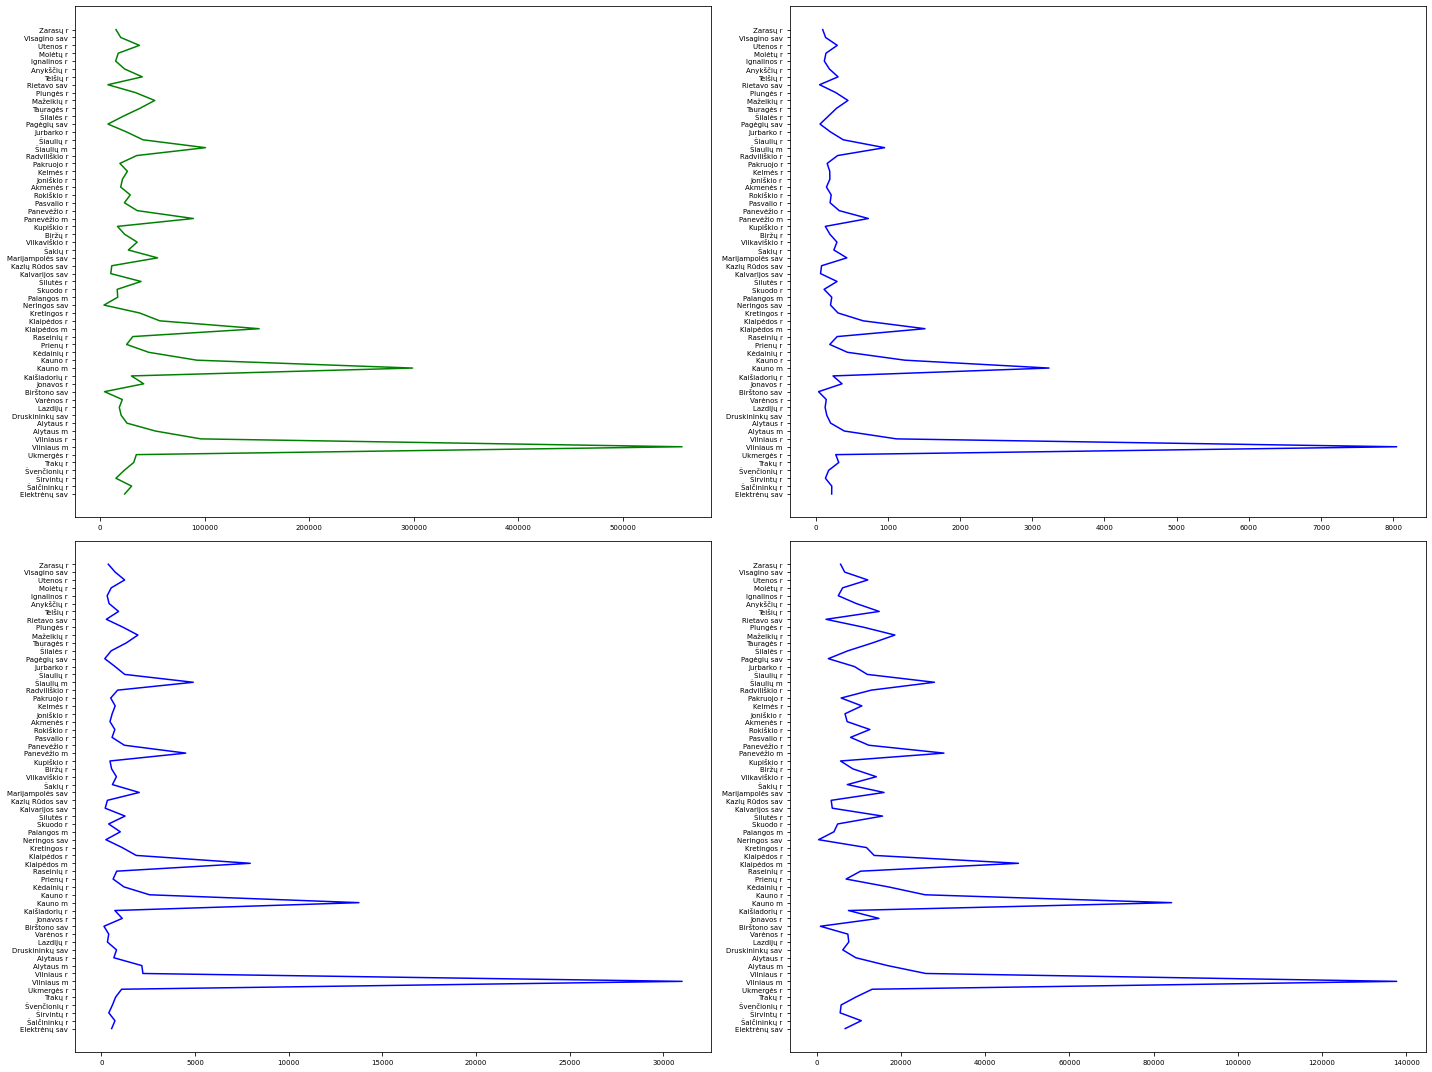

In [168]:
plt.subplots(2, 2, figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(apibendrinti_duomenys['Is_viso'], apibendrinti_duomenys['savivaldybes_pav'], color='g')
plt.title='Gyventojų skaičius'
plt.tick_params(labelsize=7)

plt.subplot(2,2,2)
plt.plot(apibendrinti_duomenys['Pajamos, mEUR'], apibendrinti_duomenys['savivaldybes_pav'], color='b')
plt.title='Pajamos'
plt.tick_params(labelsize=7)


plt.subplot(2,2,3)
plt.plot(apibendrinti_duomenys['Darbdaviu sk'],apibendrinti_duomenys['savivaldybes_pav'], color='b')
plt.title='Darbdavių skaičius'
plt.tick_params(labelsize=7)


plt.subplot(2,2,4)
plt.plot(apibendrinti_duomenys['Bedarbiu sk'], apibendrinti_duomenys['savivaldybes_pav'], color='b')
plt.title='Bedarbių skaičius'
plt.tick_params(labelsize=7)

plt.tight_layout()

Iš pirminės apžvalgos matoma, kad gaunamomis pajamomis, darbdavių ir bedarbių skaičiumi smarkiai išsiskiria didieji miestai dėl didesnio bendro gyventojų skaičiaus juose. 
Toliau analizuoju duomenis, atsižvelgiant į populiaciją savivaldybėje.  

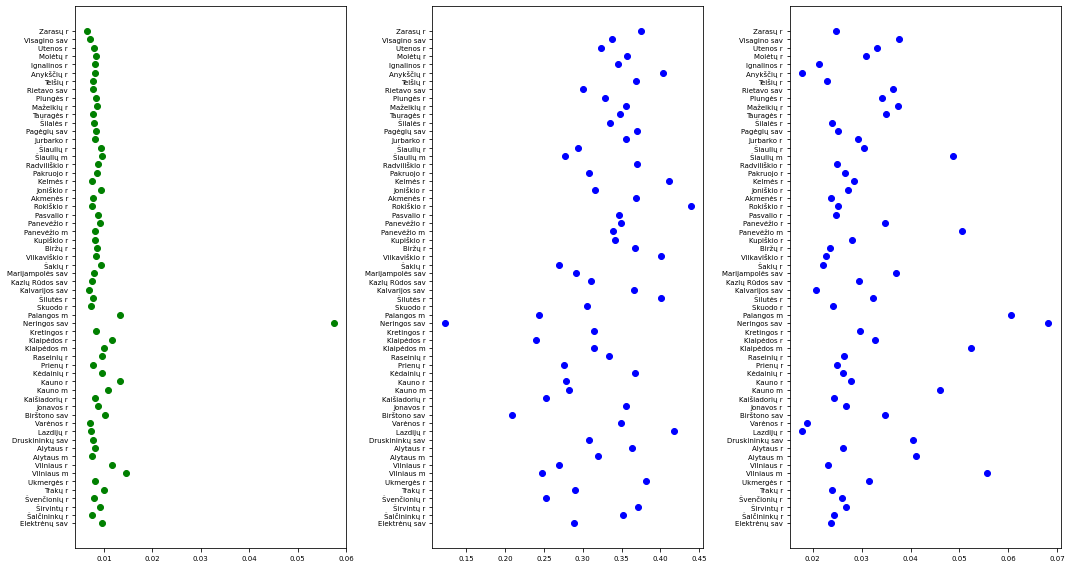

In [175]:
plt.subplots(1, 3, figsize=(15,8))
plt.subplot(1,3,1)
plt.scatter((apibendrinti_duomenys['Pajamos, mEUR']/apibendrinti_duomenys['Is_viso']), apibendrinti_duomenys['savivaldybes_pav'], color='g')
plt.title='Pajamos/Gyvetojas '
plt.tick_params(labelsize=7)


plt.subplot(1,3,2)
plt.scatter((apibendrinti_duomenys['Bedarbiu sk']/apibendrinti_duomenys['Is_viso']), apibendrinti_duomenys['savivaldybes_pav'], color='b')
plt.title='Bedarbiai/Gyventojas'
plt.tick_params(labelsize=7)


plt.subplot(1,3,3)
plt.scatter((apibendrinti_duomenys['Darbdaviu sk']/apibendrinti_duomenys['Is_viso']),apibendrinti_duomenys['savivaldybes_pav'], color='b')
plt.title='Dardaviai/Gyventojas'
plt.tick_params(labelsize=7)

plt.tight_layout()

Neringos savivaldybė išsiskiria smarkiai didesnėmis pajamomis, lyginant su kitomis savivaldybėmis. Taip pat Neringoje ženkliai mažesnis bedarbių skaičius tenkantis vienam gyventojui ir didžiausias darbdavių skaičius. Panaši tendecija matoma ir Palangoje. Taip pat Lazdijų, Akmenės rajono, Kalvarijos savivaldybėse matomas aukštas nedarbo lygis ir nedidelis skaičius darbdavių. Galima daryti prielaidą, kad bedarbių skaičius priklauso nuo darbdavių skaičiaus savivaldybėje. Tačiau, atlikus vizualinę analizę, aiškios priklausomybės nesimato. 

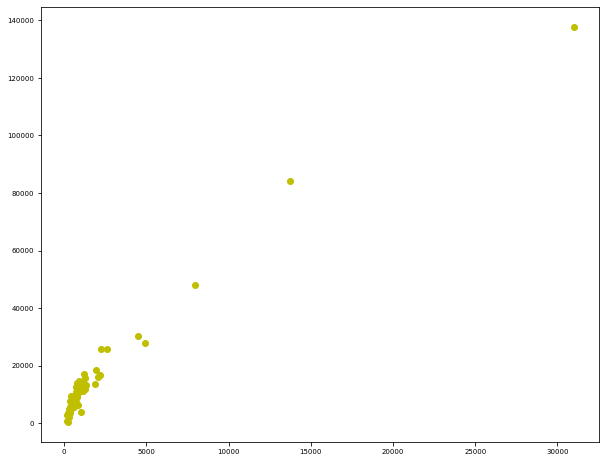

In [205]:
plt.figure(figsize=(10,8))
plt.scatter(apibendrinti_duomenys['Darbdaviu sk'], apibendrinti_duomenys['Bedarbiu sk'], color='y')

plt.tick_params(labelsize=7)
plt.title='Bedarbiu skaičiaus priklausomybė nuo Darbdavių skaičiaus'


Papildomai noriu pasižiūrėti, ar darbdavių skaičius savivaldybėse daro įtaką gyventojų gaunamoms pajamoms. 


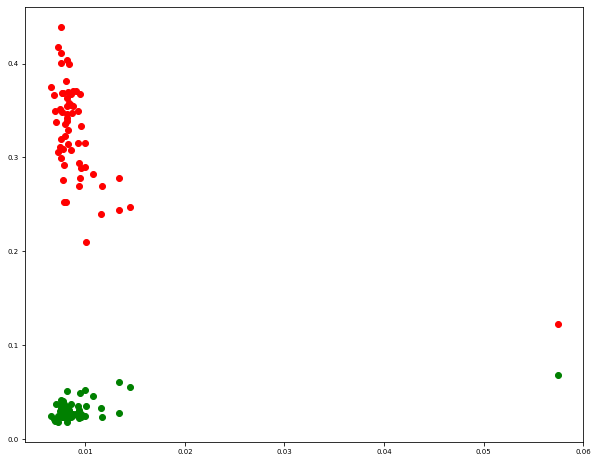

In [208]:
plt.figure(figsize=(10,8))
plt.scatter((apibendrinti_duomenys['Pajamos, mEUR']/apibendrinti_duomenys['Is_viso']),(apibendrinti_duomenys['Darbdaviu sk']/apibendrinti_duomenys['Is_viso']), color='g')
plt.scatter((apibendrinti_duomenys['Pajamos, mEUR']/apibendrinti_duomenys['Is_viso']),(apibendrinti_duomenys['Bedarbiu sk']/apibendrinti_duomenys['Is_viso']), color='r')
plt.tick_params(labelsize=7)
plt.title='Gaunamų pajamų priklausomybė nuo Darbdavių skaičiaus'

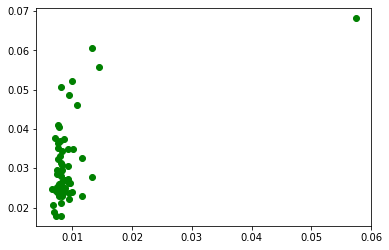

In [209]:
plt.scatter((apibendrinti_duomenys['Pajamos, mEUR']/apibendrinti_duomenys['Is_viso']),(apibendrinti_duomenys['Darbdaviu sk']/apibendrinti_duomenys['Is_viso']), color='g')


Atlikus sekančią analizę apie gaunamų pajamų ir nedarbo bei darbadvių skaičiaus sąsajas, sunkiai įžvelgiama priklausomybė. Galima daryt išvadą, kad gyventojų pajamos savivaldybėse priklauso nuo kitokių faktorių nei asmenų užimtumo savivaldybėse ir potencialių darbdavių. 
Reikėtų atlikti papildomą analizę apie kitus socialinius ir eknominius faktorius, kaip išsilavinimas, turizmo lygis, esančių darbdavių verslo pelningumas ir pan., išsiaiškinti nuo ko priklauso ir kaip kinta gyventojų pajamos Lietuvos savivaldybėse. 